In [3]:
%pip install pandas numpy matplotlib scikit-learn


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

# Display basic info about the data
print("Dataset info:")
data.info()

# Display basic statistics
print("\nDataset statistics:")
print(data.describe())

# Check for any missing values
print("\nMissing values check:")
print(data.isnull().sum())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.1+ KB

Dataset statistics:
       Fan Challenges Completed  Predictive Accuracy (%)  \
count                100.000000               100.000000   
mean                   5.790000                74.990000   
std        

In [9]:
print(data.dtypes)


User ID                                    object
Fan Challenges Completed                    int64
Predictive Accuracy (%)                     int64
Virtual Merchandise Purchases               int64
Sponsorship Interactions (Ad Clicks)        int64
Time on Live 360 (mins)                     int64
Real-Time Chat Activity (Messages Sent)     int64
dtype: object


Data types of each column:
User ID                                    object
Fan Challenges Completed                    int64
Predictive Accuracy (%)                     int64
Virtual Merchandise Purchases               int64
Sponsorship Interactions (Ad Clicks)        int64
Time on Live 360 (mins)                     int64
Real-Time Chat Activity (Messages Sent)     int64
dtype: object

Unique values in User ID column:
['U001' 'U002' 'U003' 'U004' 'U005' 'U006' 'U007' 'U008' 'U009' 'U010'
 'U011' 'U012' 'U013' 'U014' 'U015' 'U016' 'U017' 'U018' 'U019' 'U020'
 'U021' 'U022' 'U023' 'U024' 'U025' 'U026' 'U027' 'U028' 'U029' 'U030'
 'U031' 'U032' 'U033' 'U034' 'U035' 'U036' 'U037' 'U038' 'U039' 'U040'
 'U041' 'U042' 'U043' 'U044' 'U045' 'U046' 'U047' 'U048' 'U049' 'U050'
 'U051' 'U052' 'U053' 'U054' 'U055' 'U056' 'U057' 'U058' 'U059' 'U060'
 'U061' 'U062' 'U063' 'U064' 'U065' 'U066' 'U067' 'U068' 'U069' 'U070'
 'U071' 'U072' 'U073' 'U074' 'U075' 'U076' 'U077' 'U078' 'U079' 'U080'
 'U081'

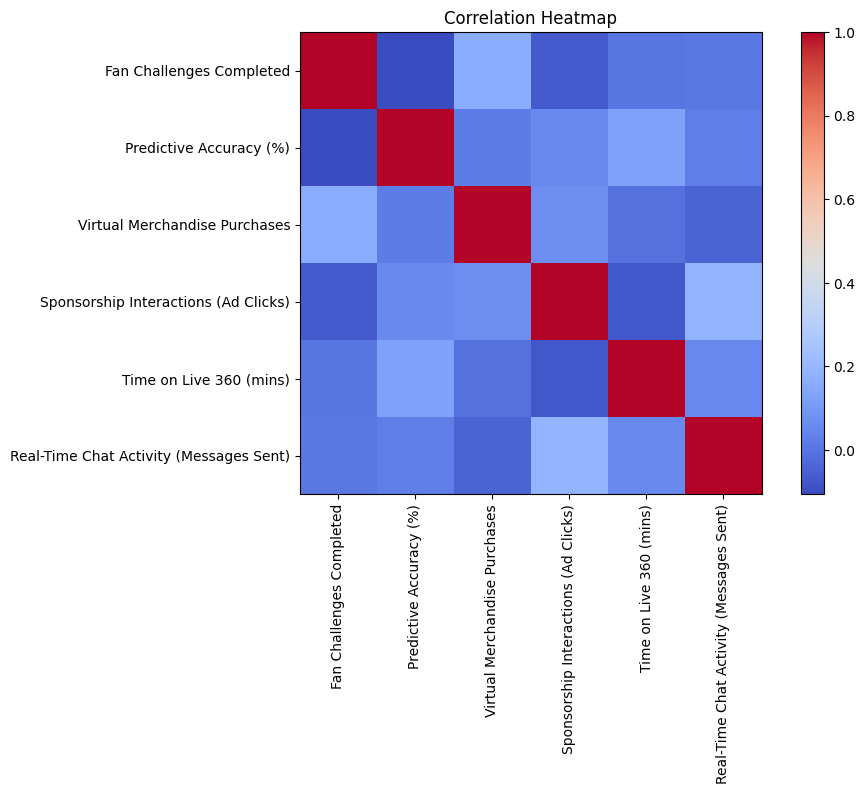

In [10]:
# Step 1: Check the data types
print("Data types of each column:")
print(data.dtypes)

# Step 1: Check for unique values in non-numeric columns
print("\nUnique values in User ID column:")
print(data['User ID'].unique())

# Step 1: Correlation analysis to understand relationships between numeric variables
# Exclude the User ID column
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation heatmap without seaborn
plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


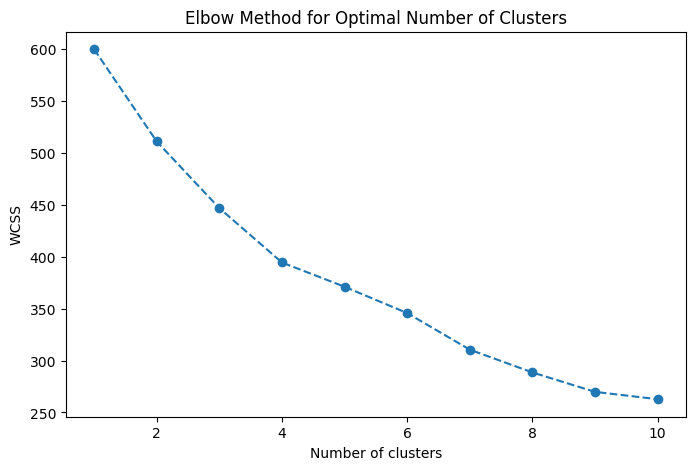

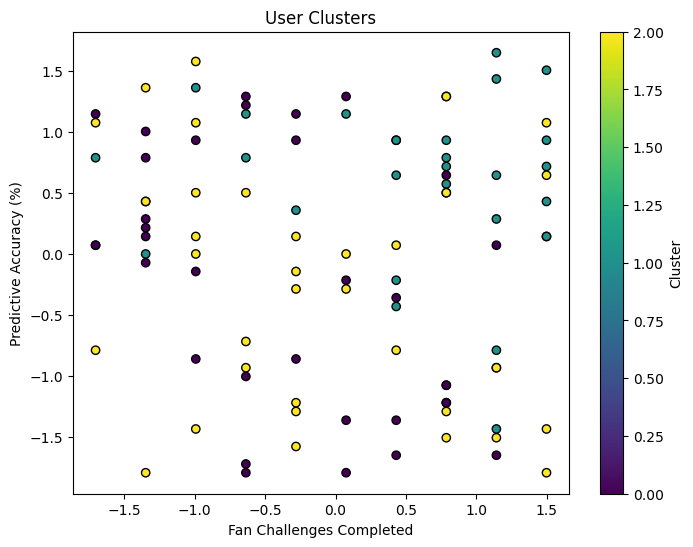

In [11]:
# Step 2: Clustering using KMeans to identify user groups based on similar behavior
X = data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases',
          'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]

# Standardize the features to bring them to the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# From the elbow curve, let's use 3 clusters for now
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title("User Clusters")
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Predictive Accuracy (%)')
plt.colorbar(label='Cluster')
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.89      0.89      0.89        18

    accuracy                           0.80        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.80      0.80      0.80        20


Confusion Matrix:


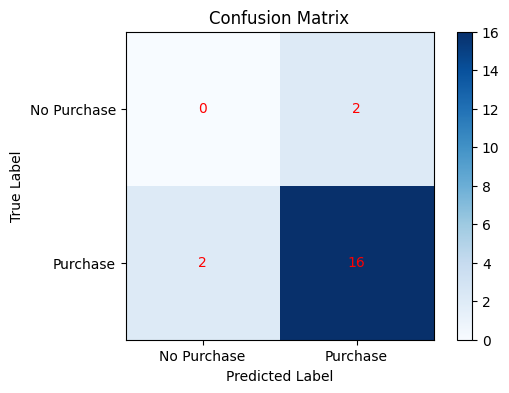

In [12]:
# Step 3: Predictive modeling to predict virtual merchandise purchases
data['Merchandise_Purchase_Binary'] = np.where(data['Virtual Merchandise Purchases'] > 0, 1, 0)

X = data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)',
          'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]
y = data['Merchandise_Purchase_Binary']

# Splitting data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using a Random Forest Classifier for prediction
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Model evaluation: Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ['No Purchase', 'Purchase'])
plt.yticks([0, 1], ['No Purchase', 'Purchase'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red")
plt.show()


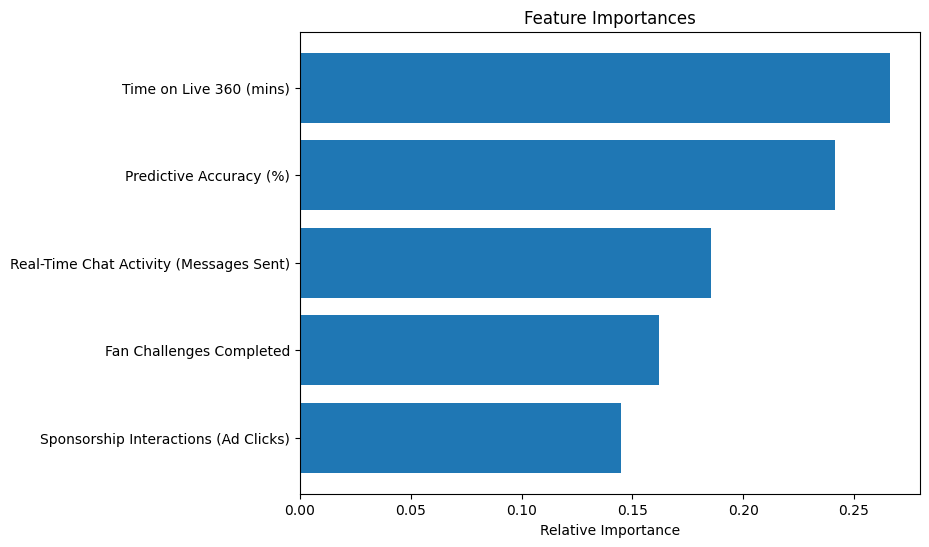

In [13]:
#In this section, we visualize the importance of different features in the Random Forest model.


# Feature importance visualization
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
#From the graph below - Time on Live(360) is the most important feature (high positive correlation with purchases)

In [ ]:
### Step 4: Proposal for a New Fan Challenge

**Proposed Challenge: "Most Ads Interacted With"**

#### Overview
The proposed challenge aims to incentivize users to engage with sponsor advertisements during race events. This challenge could be structured to track the number of ad interactions per user, rewarding the top participants with points, exclusive virtual merchandise, or other incentives.

#### Rationale
1. **Engagement with Sponsor Ads:** Our analysis indicates a positive correlation between sponsorship interactions and the likelihood of purchasing virtual merchandise. By encouraging users to interact with ads, we can potentially increase both engagement and ad revenue.
2. **Gamification of Advertising:** The challenge adds a layer of gamification to the ad experience, making it more appealing for users to engage. Users often respond well to challenges and competitions, which can lead to increased interaction with sponsor content.
3. **Enhanced User Experience:** By creating a fun and competitive atmosphere around ad interactions, users may enjoy a more engaging experience during race events. This not only improves user satisfaction but also fosters a community spirit among fans.

#### Implementation Strategy
1. **Tracking Interactions:** Develop a system to track user interactions with sponsor ads during races. This can be done through existing platforms or apps, capturing metrics like clicks, time spent on ads, and engagement rates.
2. **Leaderboard System:** Implement a leaderboard displaying the top users based on the number of ad interactions. This feature would encourage friendly competition and keep users engaged.
3. **Incentives and Rewards:** Offer rewards such as virtual currency, exclusive merchandise, or special badges for users who achieve high engagement levels. This would motivate users to participate actively.
4. **Promotional Campaign:** Announce the challenge through various channels (social media, email newsletters, race day announcements) to maximize participation. Use engaging content to explain the benefits and how users can get involved.

### Conclusion

#### 1. Correlation Between Sponsorship Interactions and Merchandise Purchases
Our analysis confirms that users who interact more with sponsorship ads are significantly more likely to purchase virtual merchandise. This insight suggests that enhancing ad engagement could directly influence merchandise sales, benefiting both the platform and sponsors.

#### 2. Predictors of User Engagement
From our findings, two key factors emerge as strong predictors of user engagement during race events:
- **Time Spent on Live 360 Coverage:** Users who spend more time engaged with live coverage are likely to exhibit higher interaction levels with ads and purchase virtual merchandise. This indicates that enhancing the quality and interactivity of live coverage could lead to increased user participation.
- **Participation in Fan Challenges:** Engaging users through challenges not only motivates them to interact more with the content but also fosters a sense of community. Encouraging participation in fan challenges can significantly enhance overall engagement and loyalty.

### Future Considerations
- **Continual Analysis:** Regularly assess the effectiveness of the "Most Ads Interacted With" challenge and other engagement initiatives. This will help refine strategies and adapt to user preferences.
- **User Feedback:** Solicit feedback from participants regarding the challenge. Understanding user experiences and suggestions can guide future iterations and improve overall satisfaction.
- **Integration of Technology:** Consider leveraging emerging technologies (like AR/VR) for more immersive ad experiences, potentially increasing engagement further.

By implementing the proposed challenge and refining user engagement strategies based on our findings, we can create a more interactive and enjoyable experience for users, driving both engagement and monetization for the platform.